In [1]:
from wrangle import get_311_data, clean_311, split_separate_scale
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats


import warnings
warnings.filterwarnings("ignore")
import os
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# Preparing the notebook by importing necessary modules
# SK Learn Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier, LogisticRegression, RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# Standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from math import sqrt

# Formatting my notebook
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
df= clean_311(get_311_data())

In [4]:
df.head(1)

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
551,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2407 WYOMING ST, San Antonio, 78203",2,2142962.0,13699885.0,1392.0,8,-1385.0,174.0,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78203,1,2017,4,19055,59.81


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356804 entries, 551 to 399979
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 356804 non-null  datetime64[ns]
 1   due_date                  356804 non-null  datetime64[ns]
 2   closed_date               356804 non-null  datetime64[ns]
 3   is_late                   356804 non-null  object        
 4   dept                      356804 non-null  object        
 5   call_reason               356804 non-null  object        
 6   case_type                 356804 non-null  object        
 7   case_status               356804 non-null  object        
 8   source_id                 356804 non-null  object        
 9   address                   356804 non-null  object        
 10  council_district          356804 non-null  int64         
 11  longitude                 356804 non-null  float64       
 12  

In [6]:
df.isna().sum()

open_date                   0
due_date                    0
closed_date                 0
is_late                     0
dept                        0
call_reason                 0
case_type                   0
case_status                 0
source_id                   0
address                     0
council_district            0
longitude                   0
latitude                    0
days_open                   0
resolution_days_due         0
days_before_or_after_due    0
pct_time_of_used            0
level_of_delay              0
district_1                  0
district_2                  0
district_3                  0
district_4                  0
district_5                  0
district_6                  0
district_7                  0
district_8                  0
district_9                  0
district_10                 0
voter_turnout_2019          0
num_of_registered_voters    0
zipcode                     0
open_month                  0
open_year                   0
open_week 

In [7]:
df.closed_date.isna().sum()

0

In [8]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = split_separate_scale(df, stratify_by= 'level_of_delay')

In [9]:
train.head(1)

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
71261,2020-06-19,2020-06-21,2020-06-20,NO,Solid Waste Management,misc,Dead Animal Pick Up,Closed,Web Portal,"1820 E HOUSTON ST, SAN ANTONIO, 78202",2,2137414.0,13702390.0,1.0,3,1.0,0.333333,Very Early Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78202,6,2020,25,19055,59.81


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199810 entries, 71261 to 137532
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 199810 non-null  datetime64[ns]
 1   due_date                  199810 non-null  datetime64[ns]
 2   closed_date               199810 non-null  datetime64[ns]
 3   is_late                   199810 non-null  object        
 4   dept                      199810 non-null  object        
 5   call_reason               199810 non-null  object        
 6   case_type                 199810 non-null  object        
 7   case_status               199810 non-null  object        
 8   source_id                 199810 non-null  object        
 9   address                   199810 non-null  object        
 10  council_district          199810 non-null  int64         
 11  longitude                 199810 non-null  float64       
 12

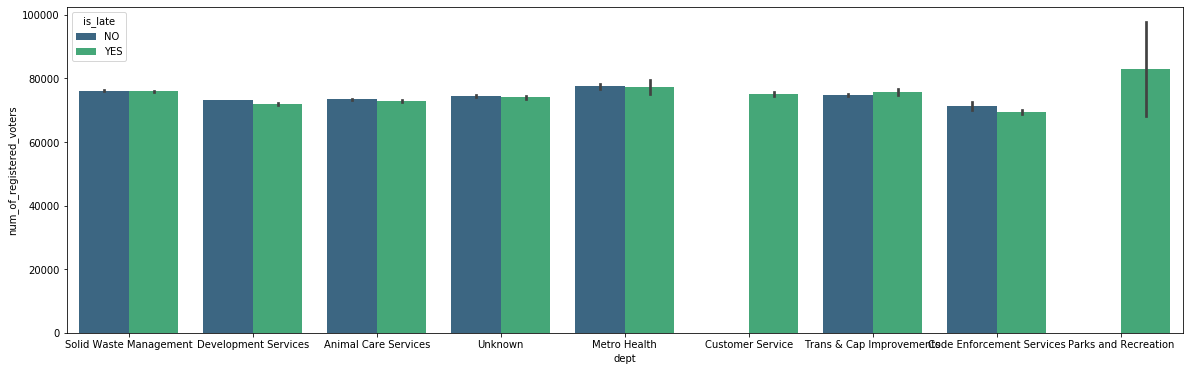

In [11]:
plt.figure(figsize=(20, 6))
sns.barplot(x="dept", y="num_of_registered_voters", hue="is_late", data=train, palette='viridis')

['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app'] with dummies

['resolution_days_due', 'district_2', 'voter_turnout_2019', 'num_of_registered_voters', 'open_month', 'open_year', 'open_week', 'per_capita_income'] - without dummies

is_late,NO,YES
council_district,,
1,22651,3174
2,21259,5135
3,21413,4251
4,16557,2967
5,24576,3589
6,14625,2356
7,16327,2629
8,9424,1411
9,9768,1134


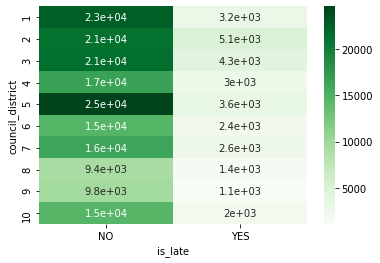

In [12]:
data = pd.crosstab(train.council_district, train['is_late'])
sns.heatmap(data, annot=True, cmap=plt.cm.Greens)
data

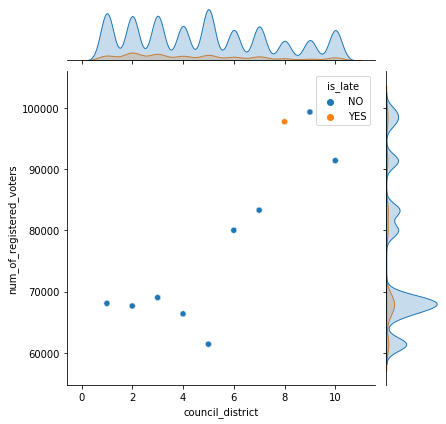

In [13]:
sns.jointplot(data=train, x="council_district", y="num_of_registered_voters", hue='is_late')

In [ ]:
sns.catplot(y="is_late", x="num_of_registered_voters", hue='dept', data=train)

### 2 Tailed T-Test Hypothesis Testing #1:
####    $H_0$: Number of registered voters does not affect the number of days open.
####    $H_a$: District 5 has the longest number of days open due to the having the lowest number of registered voters. 
##### alpha ($\alpha$): 1 - confidence level (95% confidence level -> $\alpha = .05$)

In [ ]:
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
null_hypothesis = 'the number of registered voters in a district does not affect the number of days open.' # set the null hypothesis

x1 = train[train.council_district == 5].days_open
x2 = train[train.council_district != 5].days_open
t, p= stats.ttest_ind(x1, x2)
if p > α:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

### Chi$^2$ Hypothesis Testing #2:
####    $H_0$: Number of registered voters does not affect the level of delay.
####    $H_a$: District 5 has the highest level of delay due to the having the lowest number of registered voters. 
##### alpha ($\alpha$): 1 - confidence level (95% confidence level -> $\alpha = .05$)

In [ ]:
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
null_hypothesis = 'the number of registered voters in a district does not affect the level of delay.' # set the null hypothesis

In [ ]:
# make contigency table
contingency_table = pd.crosstab(train.council_district, train.level_of_delay)
# run chi squared test
test_results = stats.chi2_contingency(contingency_table)
# find p value
_, p, _, expected = test_results

#give results of statistical testing
if p > α:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

# Model 

In [ ]:
from model import model_df, model_split_separate_scale

In [ ]:
df_1 = model_df()

In [ ]:
df_1.head()

In [ ]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = model_split_separate_scale(df_1)

## Make baseline predictions 

In [ ]:
#Making a baseline prediction
df.level_of_delay.value_counts()

In [ ]:
# set up y_train, y_validate, and y_test as dataframes
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [ ]:
#concatenating the baseline prediction to the y_train
y_train['baseline'] = 'Very Early Response'

In [ ]:
y_train.head()

In [ ]:
# calculate accuracy of baseline

print(' Baseline Accuracy: {:.2%}'.format(accuracy_score(y_train.level_of_delay, y_train.baseline)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.baseline, y_train.level_of_delay))
print('---')
print(classification_report(y_train.level_of_delay, y_train.baseline))

In [ ]:
X_train.columns

In [ ]:
X_train.info()

In [ ]:
X_train.drop(columns=['is_late', 'dept',
       'call_reason', 'case_type', 'case_status', 'source_id', 'address', 'zipcode' ], inplace=True)
X_validate.drop(columns=['is_late', 'dept',
       'call_reason', 'case_type', 'case_status', 'source_id', 'address', 'zipcode'], inplace=True)
X_test.drop(columns=['is_late', 'dept',
       'call_reason', 'case_type', 'case_status', 'source_id', 'address', 'zipcode'], inplace=True)

In [ ]:
y_train.drop(columns=['baseline'], inplace=True)

In [ ]:
# create the model object
generic_clf = RidgeClassifier(random_state=123)

In [ ]:
# fit to train only
generic_clf.fit(X_train, y_train)
y_pred = generic_clf.predict(X_train)
# evaluate with score, returns the mean accuracy on the given test data and labels
print('Accuracy of Ridge classifier on training set:', generic_clf.score(X_train, y_train.level_of_delay))